In [167]:
from tqdm import tqdm
tqdm.pandas()

In [168]:
%matplotlib inline

from wordcloud import WordCloud # 워드클라우드 제작 라이브러리
import pandas as pd # 데이터 프레임 라이브러리
import numpy as np # 행렬 라이브러리
import matplotlib.pyplot as plt # 워드클라우드 시각화 라이브러리
import seaborn as sns

#warning 메시지 표시 안함
import warnings
warnings.filterwarnings(action = 'ignore')
from konlpy.tag import Okt 
okt = Okt()

In [169]:
data = pd.read_excel('더파이널스리뷰_빅헤드.xlsx')
#필요없는 컬럼 삭제
del data['Unnamed: 0']
data.head()

,id,comment
0,빅헤드,어제 베타가 열려서 플레이해보고 느낀 '개인적인' 문제점1.최적화가 갑자기 뒤졌습니...
1,Mun Yumin,이거 트레일러에 한국중계진 목소리 나레이션으로 계속 나오던데 OST가 중간에 계속나...
2,Ged Wed,이게 아직 다 완성이 안돼서 그렇지 모션이랑 이펙트 좀 개선해서 출시되면 진짜 개꿀...
3,Hyun-joong Kim,와..진짜 게임이해도랑 센스는...진짜 너무 부럽고 쩐다...부디 fps암흑기에 부...
4,1S1K,"진짜 경기하는듯한 확성기 나레이션과, 대회같은 배경음악과 사운드, 다양한 가젯선택으..."


In [170]:
len(data)

463

In [171]:
#결측치확인
print(data.isnull().sum())

id         1
comment    0
dtype: int64


In [172]:
#결측치 제거
data.dropna(inplace=True)

In [173]:
#결측치확인
print(data.isnull().sum())

id         0
comment    0
dtype: int64


In [174]:
# 유니크한 샘플의 수 또는 중복을 제거한 샘플의 수
print(data['comment'].nunique())

461


In [175]:
data.drop_duplicates(subset=['comment'], inplace=True)
len(data)

461

In [176]:
data['comment'].value_counts()

어제 베타가 열려서 플레이해보고 느낀 '개인적인' 문제점1.최적화가 갑자기 뒤졌습니다. 분명 프리뷰 때는 144가 방어가 됐는데 갑자기 60도 방어가 안되는 중 2.솔큐돌려보니까 리스폰 +전멸리스크 너무 큼... 3인큐 할때처럼 삥뽕해서 살리는 것도 안되는데 팀원들 주르륵 죽으면 최대 60초정도 손가락 빨아야함 겜이 대충 5분인데 3.짚라인이나 점프패드 탈 때 조작감이 역시 큰 단점    1
진짜 재밌다니까?                                                                                                                                                                                                                  1
유저들 개돼지 취급하면서 쓸어 모았던 돈들 이제야 좀 제대로 쓰고 있네                                                                                                                                                                                    1
배그 오버워치 서든 합치면서 맵만 꾸민느낌인대                                                                                                                                                                                                  1
참고로 이겜 베브개발진들이 들어간걸로 알아요ㅋㅋ                                                                                          

In [177]:
data['comment'] = data['comment'].str.replace('[^가-힣]', ' ', regex = True)
data['comment']

0      어제 베타가 열려서 플레이해보고 느낀  개인적인  문제점  최적화가 갑자기 뒤졌습니...
1      이거 트레일러에 한국중계진 목소리 나레이션으로 계속 나오던데    가 중간에 계속나...
2      이게 아직 다 완성이 안돼서 그렇지 모션이랑 이펙트 좀 개선해서 출시되면 진짜 개꿀...
3      와  진짜 게임이해도랑 센스는   진짜 너무 부럽고 쩐다   부디    암흑기에 부...
4      진짜 경기하는듯한 확성기 나레이션과  대회같은 배경음악과 사운드  다양한 가젯선택으...
                             ...                        
458                                                   오올
459                              너무 시끄럽워  게임이  실감이 전혀 없어
460                                            음    모르겠다
461                                              재미없어보이누
462                                          네 재미 없어보이네요
Name: comment, Length: 461, dtype: object

In [179]:
import konlpy
kkma = konlpy.tag.Kkma() #형태소 분석기 꼬꼬마(Kkma)

nouns = data['comment'].apply(kkma.nouns)
nouns

0      [어제, 베타, 플레이, 개인적, 문제점, 최적화, 분, 분명, 명, 프리뷰, 때,...
1      [이거, 트레일러, 한국, 한국중계, 중계, 목소리, 레이션, 중간, 게임, 게임컨...
2      [이것, 완성, 모션, 이펙트, 개선, 출시, 진짜, 개꿀, 개꿀잼, 잼, 듯, 대...
3                   [진짜, 게임, 게임이해도, 이해도, 센스, 암흑기, 부흥, 길]
4      [진짜, 경기, 확성기, 레이션, 대회, 배경, 배경음악, 음악, 사운드, 다양, ...
                             ...                        
458                                                  [오]
459                               [시, 시끄럽워, 끄럽워, 게임, 실감]
460                                                   []
461                                                   []
462                                                 [재미]
Name: comment, Length: 461, dtype: object

In [180]:
nouns = nouns.explode()
nouns

0       어제
0       베타
0      플레이
0      개인적
0      문제점
      ... 
459     게임
459     실감
460    NaN
461    NaN
462     재미
Name: comment, Length: 3032, dtype: object

In [181]:
df_word = pd.DataFrame({'word' : nouns})
df_word['count'] = df_word['word'].str.len()
df_word = df_word.query('count >= 2')
df_word

,word,count
0,어제,2.0
0,베타,2.0
0,플레이,3.0
0,개인적,3.0
0,문제점,3.0
...,...,...
459,시끄럽워,4.0
459,끄럽워,3.0
459,게임,2.0
459,실감,2.0


In [182]:
df_word = df_word.groupby('word', as_index = False).count().sort_values('count', ascending = False)
df_word

,word,count
59,게임,95
188,느낌,42
373,배필,31
140,기대,22
1091,헤드,21
...,...,...
509,스킬,1
510,스타,1
111,광고여,1
512,스타일리쉬,1


In [183]:
# 불필요한 단어 제거
df_word = df_word.iloc[3:, :]
df_word.head(5)

,word,count
140,기대,22
1091,헤드,21
694,이거,19
617,영상,17
1051,필드,14


In [184]:
#새롭게 인덱스부여
df_word.reset_index(inplace=True)

del df_word['index']

df_word

,word,count
0,기대,22
1,헤드,21
2,이거,19
3,영상,17
4,필드,14
...,...,...
1112,스킬,1
1113,스타,1
1114,광고여,1
1115,스타일리쉬,1


In [185]:
dic_word = df_word.set_index('word').to_dict()['count']
dic_word

{'기대': 22,
 '헤드': 21,
 '이거': 19,
 '영상': 17,
 '필드': 14,
 '플레이': 13,
 '빅헤드': 12,
 '브금': 12,
 '슈퍼': 12,
 '하이퍼': 12,
 '피플': 11,
 '모션': 11,
 '개발': 10,
 '넥슨': 10,
 '사람': 10,
 '파괴': 10,
 '오버': 10,
 '에이펙스': 10,
 '옵치': 9,
 '요즘': 9,
 '재미': 9,
 '콜옵': 9,
 '개발자': 9,
 '슈퍼피플': 9,
 '하이': 8,
 '생각': 8,
 '진짜': 8,
 '운영': 8,
 '데이': 7,
 '오픈': 7,
 '오버워': 7,
 '트레일러': 7,
 '페이데이': 7,
 '한국': 7,
 '출시': 7,
 '건물': 7,
 '레식': 7,
 '해외': 6,
 '유료': 6,
 '속도감': 6,
 '효과': 6,
 '라인': 6,
 '케이프': 6,
 '정도': 6,
 '하면': 6,
 '오버워치': 6,
 '개인적': 6,
 '그래픽': 6,
 '광고': 6,
 '부활': 6,
 '다이스': 6,
 '포트': 6,
 '여기': 5,
 '모드': 5,
 '사운드': 5,
 '약간': 5,
 '목소리': 5,
 '고인물': 5,
 '이게임': 5,
 '제작진': 5,
 '스포츠': 5,
 '요소': 5,
 '인기': 5,
 '성공': 5,
 '가요': 5,
 '흥행': 5,
 '코프': 5,
 '타격': 5,
 '컨셉': 5,
 '케이': 5,
 '편집': 5,
 '포트나이트': 4,
 '노래': 4,
 '퍼스': 4,
 '에펙': 4,
 '보임': 4,
 '파이': 4,
 '대회': 4,
 '베타': 4,
 '도감': 4,
 '정식': 4,
 '타르': 4,
 '동기': 4,
 '신작': 4,
 '타르코프': 4,
 '하나': 4,
 '하이퍼스케이프': 4,
 '하다': 4,
 '국내': 4,
 '모던': 4,
 '지리': 4,
 '지형': 4,
 '냄새': 4,
 '총기': 4,
 '편집자'

<function matplotlib.pyplot.show(close=None, block=None)>

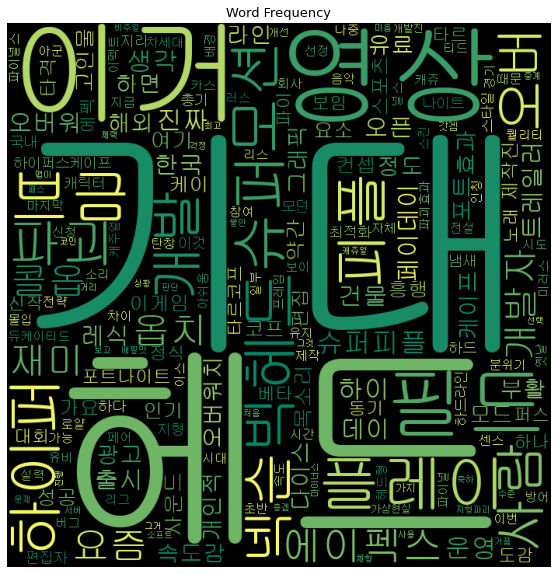

In [186]:
#워드클라우드
wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\gulim.ttc', width = 700, height = 700, background_color = 'black', 
                       colormap = 'summer', random_state =1).generate_from_frequencies(dic_word)

#빈출단어 시각화
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Frequency", size =13)
plt.show